In [2]:
# recap lecture 22 (graph traversal and path finding)

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# for notebook
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [10]:
def draw_graph_with_nx(G):
    pos = nx.spring_layout(G, iterations=200)
    options = {
        'node_color': 'lightblue',
        'alpha': 1,
        'node_size': 800,
        'width': 2,
        'font_color': 'black', 
        'font_size': 12,
        'arrows': True,
        'edge_color': 'darkred',
        'arrowsize': 20,
        'arrowstyle': '->',
        'connectionstyle': 'arc3,rad=0.1'  # This curves bidirectional edges
    }
    labels = nx.get_node_attributes(G, 'label')
    nx.draw(G, pos, labels=labels, **options)
    plt.show()

In [3]:
class DiGraph:
    def __init__(self):
        self.g = {}

    def add_node(self, node):
        if node in self.g:
            raise ValueError('node already existed in graph')

        self.g[node] = []

    def add_edges(self, src, dest):
        # sanity checks
        if src not in self.g:
            raise ValueEror('source node does not exist')

        if dest not in self.g:
            raise ValueEror('destination node does not exist')

        nexts = self.g[src]
        if dest in nexts:
            return

        nexts.append(dest)

    # function to draw the graph
    def draw_graph(self):
        G = nx.DiGraph()
        for src in self.g:
            G.add_node(src, label=src)
            for dest in self.g[src]:
                G.add_edge(src, dest)
        draw_graph_with_nx(G)

In [4]:
g = DiGraph()
nodes = ['a', 'b', 'c', 'd', 'e', 'f']

for n in nodes:
    g.add_node(n)

In [5]:
edges = [
    ('a', 'b'),
    ('a', 'c'),
    ('b', 'c'),
    ('b', 'd'),
    ('c', 'd'),
    ('d', 'c'),
    ('f', 'c'),
    ('e', 'f'),
]

for e in edges:
    g.add_edges(e[0], e[1])

In [6]:
print(g.g)       # Abstraction Police: don't freak out! we are just looking

{'a': ['b', 'c'], 'b': ['c', 'd'], 'c': ['d'], 'd': ['c'], 'e': ['f'], 'f': ['c']}


In [7]:
import pprint
pprint.pprint(g.g)

{'a': ['b', 'c'],
 'b': ['c', 'd'],
 'c': ['d'],
 'd': ['c'],
 'e': ['f'],
 'f': ['c']}


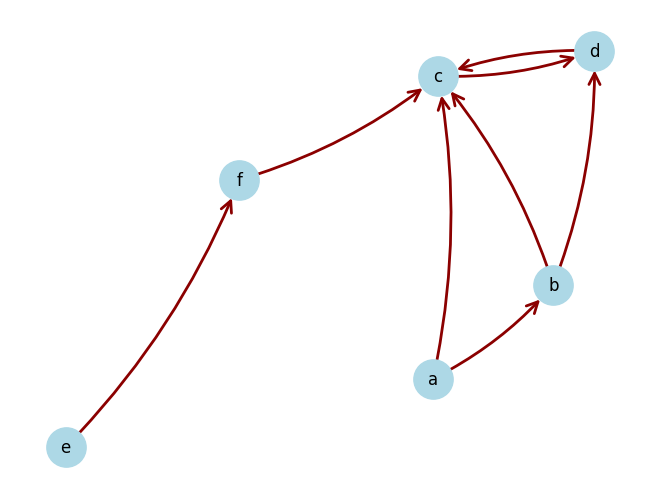

In [11]:
g.draw_graph()

In [12]:
def traverse_graph(self, start):
    """ Traverse graph starting from given start node """
    q = [start]
    visited = []

    while q:
        current = q.pop(0)

        # if we have already visited it, we can skip
        if current in visited:
            continue
        print(current)

        # we are done with current
        visited.append(current)

        # get all directly connected nodes
        next_nodes = self.g[current]

        # traverse all the nexts
        for n in next_nodes:
            q.append(n)

DiGraph.traverse_graph = traverse_graph

In [13]:
g.traverse_graph('a')     # also traverse from e

a
b
c
d


In [14]:
def find_path(self, start, end, path=[]):
    """ find path (not necessarily shortest) from start to end """

    # sanity check
    if start not in self.g:
        raise ValueError("source node not in graph")

    # save the path we traversed till now
    path = path + [start]          # same as -> path.append(start)

    # base case
    if start == end:
        return path

    # recursive case
    for node in self.g[start]:
        # need to avoid cycles
        if node not in path:
            # find path from next node to
            newPath = self.find_path(node, end, path)
            if newPath:
                return newPath
    # if no path can be found from any of the next nodes to the end, there's no path
    return None

DiGraph.find_path = find_path

In [15]:
g.find_path('d', 'd')

['d']

In [16]:
g.find_path('a', 'a')

['a']

In [17]:
g.find_path('a', 'c')

['a', 'b', 'c']

In [18]:
g.find_path('a', 'd')

['a', 'b', 'c', 'd']

In [20]:
def find_all_paths(self, start, end, path=[]):
    # sanity check
    if start not in self.g:
        raise ValueError("Source node not in graph")

    # save the path we traversed till now
    path = path + [start]

    # base case
    if start == end:
        return [path]         # return paths in a list since we may have many (change)

    all_paths = []             # change

    #recursive case
    for node in self.g[start]:
        if node not in path:
            # find the path from next node to 
            all_newpaths = self.find_all_paths(node, end, path)
            if all_newpaths:
                for newpath in all_newpaths:
                    all_paths.append(newpath)

    # if no path can be found from any of the next nodes to the end, there's no path
    return all_paths

DiGraph.find_all_paths = find_all_paths

In [27]:
g.find_all_paths('a', 'c')

[['a', 'b', 'c'], ['a', 'b', 'd', 'c'], ['a', 'c']]

In [30]:
g.find_all_paths('a', 'd')

[['a', 'b', 'c', 'd'], ['a', 'b', 'd'], ['a', 'c', 'd']]